In [66]:
import json
import matplotlib.pyplot as plt
import cv2
# import numpy as np
ar=[[3,5],[2,6]]
# np.max(np.array(ar),axis=0)

ar[0][1]-ar[1][1]



-1

In [128]:
bwidth=80
bheight=105

# reference: https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def calculate_iou(det,ground_truth):
    
    yA = max(int(det[0][0]), int(ground_truth[0][1]))    
    yB = min(int(det[1][0]), int(ground_truth[1][1]))
    xB = min(int(det[1][1]), int(ground_truth[1][0]))
    xA = max(int(det[0][1]), int(ground_truth[0][0]))

    interA = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	
    detArea = (det[1][0] - det[0][0] + 1) * (det[1][1] - det[0][1]+ 1)
    gtArea = (int(ground_truth[1][0]) - int(ground_truth[0][0]) + 1) * (int(ground_truth[1][1]) - int(ground_truth[0][1]) + 1)

    IOU = interA / float(detArea + gtArea - interA)
    
    return IOU

def create_bounding_box(image_size,bounding_box_size=(bheight,bwidth),stride=5):
    boxes=[]
    for x in range(0,image_size[0]-bounding_box_size[0]-1,stride):
        for y in range(0,image_size[1]-bounding_box_size[1]-1,stride):
            new_box=[[x,y],[x+bounding_box_size[0],y+bounding_box_size[1]]]
            boxes.append(new_box.copy())
            
    return boxes

In [137]:
with open("Melli.json") as f:
    label=json.load(f)
# print(label)
bboxes=create_bounding_box(image_size=(label['imageHeight'],label['imageWidth']),stride=7)
# print(bboxes)
gt= label['shapes']
iou_list=[]
for box in bboxes:
    face=False
    max_iou=0
    for g in gt:
        iou = calculate_iou(box,g['points'])
        if iou > max_iou:
            max_iou = iou
        if iou>1:
            print("!!!",iou, g['points'],box)
    iou_list.append(max_iou)        
        
    if 0.4<max_iou:

        print(f"label for box {box} with best IOU {max_iou} is {'face' if max_iou>=0.5 else 'background'}")




label for box [[42, 483], [147, 563]] with best IOU 0.4079593705769711 is background
label for box [[42, 490], [147, 570]] with best IOU 0.4502186776434268 is background
label for box [[42, 497], [147, 577]] with best IOU 0.4245640636846095 is background
label for box [[49, 476], [154, 556]] with best IOU 0.40223880597014927 is background
label for box [[49, 483], [154, 563]] with best IOU 0.46784133321760263 is background
label for box [[49, 490], [154, 570]] with best IOU 0.5185883620689655 is face
label for box [[49, 497], [154, 577]] with best IOU 0.48772763262074426 is background
label for box [[49, 504], [154, 584]] with best IOU 0.42037628086678985 is background
label for box [[56, 476], [161, 556]] with best IOU 0.45546088303640586 is background
label for box [[56, 483], [161, 563]] with best IOU 0.5330432417731846 is face
label for box [[56, 490], [161, 570]] with best IOU 0.5937234944868532 is face
label for box [[56, 497], [161, 577]] with best IOU 0.5567522783761392 is face

(800, 1200, 3)


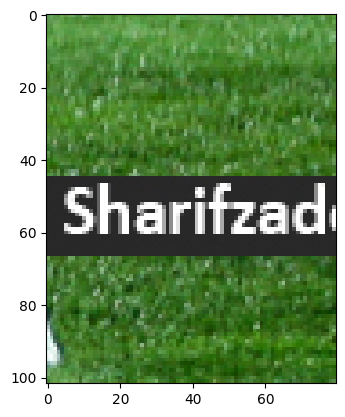

In [138]:
img=cv2.cvtColor(cv2.imread('Melli.jpg'),cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img[693:795,1092:1172])